In [1]:
import os
import sys

In [2]:
import matplotlib.pyplot as plt 
from voronoid import *
from drawvoronoid import *
import matplotlib.path as path
import matplotlib as mpl
import smopy
import pandas as pd
%matplotlib inline
import smopy
from scipy.spatial import Voronoi 
import random

In [3]:
# decorater used to block function printing to the console
def blockPrinting(func):
    def func_wrapper(*args, **kwargs):
        # block all printing to the console
        sys.stdout = open(os.devnull, 'w')
        # call the method in question
        value = func(*args, **kwargs)
        # enable all printing to the console
        sys.stdout = sys.__stdout__
        # pass the return value of the method back
        return value

    return func_wrapper

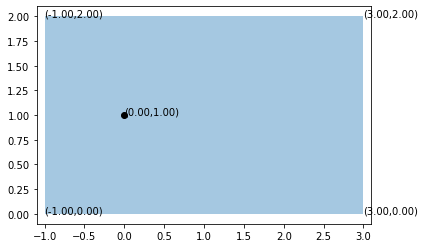

[]


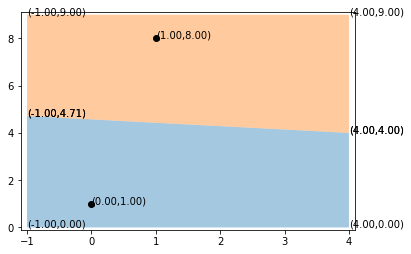

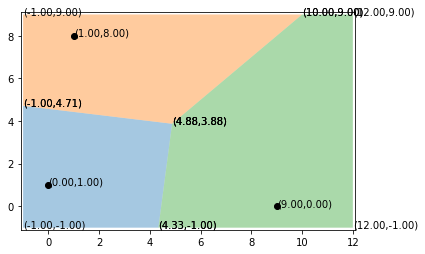

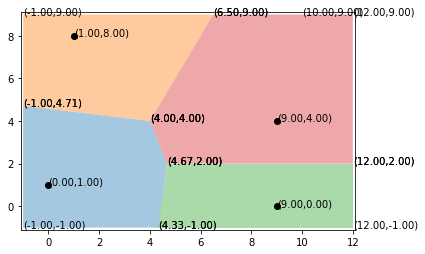

IndexError: pop from empty list

In [4]:
@blockPrinting
def findRegion(points):    
    new_regions = []
    xmin, xmax, ymin, ymax, finalpoints, regions = voronoid(points)
    regions = np.asarray(regions)
    for region in regions:
        region = np.asarray(region)
        c = region.mean(axis=0)
        angles = np.arctan2(region[:,1] - c[1], region[:,0] - c[0])
        region = np.array(region)[np.argsort(angles)]
        #polygon = vertices[region]
        new_regions.append(region)
    print(new_regions)
        
    return new_regions, finalpoints, xmin, xmax, ymin, ymax

        
        
def plotVoronoi(points):
    regions, finalpoints, xmin, xmax, ymin, ymax = findRegion(points)
    for region in regions:
        plt.fill(*zip(*region), alpha=0.4)
        for ver in region:
            plt.annotate('({:.2f},{:.2f})'.format(ver[0],ver[1]), (ver[0],ver[1]))
    for p in finalpoints:
        plt.annotate('({:.2f},{:.2f})'.format(p[0],p[1]), (p[0],p[1]))
                
                
                
        
    plt.plot(finalpoints[:,0], finalpoints[:,1], 'ko')
    #for p in finalpoints:
    #    plt.annotate('({:.2f},{:.2f})'.format(p[0],p[1]), (p[0],p[1]))
    plt.xlim(xmin - 0.1, xmax + 0.1)
    plt.ylim(ymin - 0.1, ymax + 0.1)


    plt.show()
    

np.random.seed(10)
points = np.random.randint(0, 10,(5,2))
n = len(points)
points = [(x[0], x[1]) for x in points]
#points = [ (1, 8), (9,0), (3, 3), (9,4), (1,2)]
#n = len(points)
points = list(set(points))

xygraph = Xygraph(vl=points)
xmin = xygraph.xmin - 1
ymin = xygraph.ymin - 1
v = (xmin, ymin)
points.sort(key=lambda p: ((p[0]-v[0])**2 +
                               (p[1]-v[1])**2)**(1/2), reverse=True)
cur_points = []

for i in range(n):
    print(cur_points)
    cur_points.append(points.pop())
    plotVoronoi(cur_points)
    


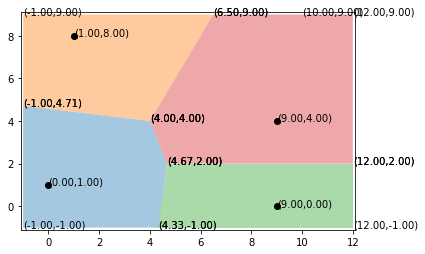

In [5]:
#points = [(0, 1), (1, 8), (2, 3), (1,3), (9, 0)]
points = [(0, 1), (1, 8), (9, 0), (9, 4)]
plotVoronoi(points)

In [7]:
cur_points

[(0, 1), (1, 8), (9, 0), (9, 4)]

In [52]:
np.random.seed(10)
points = np.random.randint(0, 10,(5,2))
n = len(points)
points = [(x[0], x[1]) for x in points]
points = list(set(points))
points


[(0, 1), (9, 0), (1, 8), (9, 4)]

In [ ]:
print('Points')
print(vor.points)
print(points)

print('\nVertices')
print(vor.vertices)
print(vertices)

print('\npoint_regionRidge points')
print(vor.ridge_points);
print(ridge_points)

print('\nRidge vertices')
print(vor.ridge_vertices)
print(ridge_vertices)

print('\nRegions')
print(vor.regions)
print(regions)

print('\nPoint region')
print(vor.point_region)
print(point_region)

{0: [(2, -1, 0), (1, -1, 0)], 2: [(0, -1, 0), (1, -1, 0)], 1: [(0, -1, 0), (2, -1, 0)]}
vs [[ -1.5          0.5       ]
 [  5.57106781  -6.57106781]
 [-11.42277877  -0.74034735]]
vs [[ -1.5          0.5       ]
 [-11.42277877  -0.74034735]
 [ -1.5         10.5       ]]
vs [[-1.5         0.5       ]
 [ 5.57106781 -6.57106781]
 [-1.5        10.5       ]]
[[1, 0, 2], [3, 0, 4], [0, 5, 6]]
[[-1.5, 0.5], [5.571067811865475, -6.571067811865475], [-11.422778767136677, -0.7403473458920846], [-11.422778767136677, -0.7403473458920846], [-1.5, 10.5], [5.571067811865475, -6.571067811865475], [-1.5, 10.5]]
--
[[1, 0, 2], [3, 0, 4], [0, 5, 6]]
--
[[ -1.5          0.5       ]
 [  5.57106781  -6.57106781]
 [-11.42277877  -0.74034735]
 [-11.42277877  -0.74034735]
 [ -1.5         10.5       ]
 [  5.57106781  -6.57106781]
 [ -1.5         10.5       ]]


[[  5.57106781  -6.57106781]
 [ -1.5          0.5       ]
 [-11.42277877  -0.74034735]]

 (5.571067811865475, -1.5, -11.422778767136677) (-6.571067811865

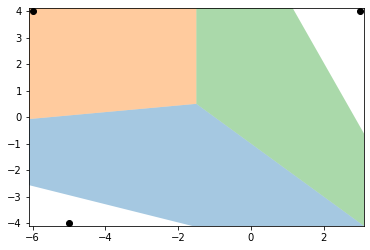

In [26]:
def voronoi_finite_polygons_library(vor,radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))
        
    print(all_ridges)

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]


        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        print('vs', vs)
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())
    print(new_regions)
    print(new_vertices)

    return new_regions, np.asarray(new_vertices)

# plot
regions, vertices = voronoi_finite_polygons_library(vor)
print("--")
print(regions)
print("--")
print(vertices)
plt.clf

print('\n')
# colorize
for region in regions:
    polygon = vertices[region]
    print(vertices[region])
    plt.fill(*zip(*polygon), alpha=0.4)
    print('\n',*zip(*polygon))

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

In [11]:
a = {1:['a'], 2:'b', 3:'c'}

In [12]:
a[1].append('b')

In [13]:
a

{1: ['a', 'b'], 2: 'b', 3: 'c'}

In [14]:
len(a[1])

2